In [2]:
import json
import pandas as pd
import numpy as np
import nltk
import re

# Loading the Data

In [3]:
with open("Client_data.json") as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data)
df.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0.0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0.0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0.0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0.0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0.0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [5]:
type(data)

list

In [6]:
data[0:5]

[{'_index': 'complaint-public-v2',
  '_type': 'complaint',
  '_id': '3211475',
  '_score': 0.0,
  '_source': {'tags': None,
   'zip_code': '90301',
   'complaint_id': '3211475',
   'issue': 'Attempts to collect debt not owed',
   'date_received': '2019-04-13T12:00:00-05:00',
   'state': 'CA',
   'consumer_disputed': 'N/A',
   'product': 'Debt collection',
   'company_response': 'Closed with explanation',
   'company': 'JPMORGAN CHASE & CO.',
   'submitted_via': 'Web',
   'date_sent_to_company': '2019-04-13T12:00:00-05:00',
   'company_public_response': None,
   'sub_product': 'Credit card debt',
   'timely': 'Yes',
   'complaint_what_happened': '',
   'sub_issue': 'Debt is not yours',
   'consumer_consent_provided': 'Consent not provided'}},
 {'_index': 'complaint-public-v2',
  '_type': 'complaint',
  '_id': '3229299',
  '_score': 0.0,
  '_source': {'tags': 'Servicemember',
   'zip_code': '319XX',
   'complaint_id': '3229299',
   'issue': 'Written notification about debt',
   'date_rec

# Data is in Json format, loading it with json_normalize.

In [6]:
df_m = pd.json_normalize(data)
df_m.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


# Text Preprocessing and Exploratory Data Analysis(EDA)

In [7]:
df_m.shape

(78313, 22)

In [8]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

### Searching for Null values.

In [9]:
df_m.isnull().sum()

_index                                   0
_type                                    0
_id                                      0
_score                                   0
_source.tags                         67413
_source.zip_code                      6757
_source.complaint_id                     0
_source.issue                            0
_source.date_received                    0
_source.state                         1991
_source.consumer_disputed                0
_source.product                          0
_source.company_response                 0
_source.company                          0
_source.submitted_via                    0
_source.date_sent_to_company             0
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                           0
_source.complaint_what_happened          0
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [10]:
df_m["_source.product"].value_counts()

Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money transfers                                       

### Assign nan in place of blanks in the complaints column

In [11]:
df_m[df_m.loc[:, '_source.complaint_what_happened'] == ''] = np.nan

In [12]:
df_m[df_m.loc[:, '_source.complaint_what_happened'] == '']

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided


In [13]:
df_m.shape

(78313, 22)

### Removing rows will Null values.

In [14]:
df_m = df_m[~df_m['_source.complaint_what_happened'].isnull()]

In [15]:
df_m.shape

(21072, 22)

### Convert _source.complaint_what_happened column to string for performing text operations.

In [16]:
df_m['_source.complaint_what_happened'] = df_m['_source.complaint_what_happened'].astype('string')

In [17]:
df_m['_source.complaint_what_happened'].dtype

string[python]

### Function to clean the text and remove all the unnecessary elements.

In [18]:
def cleanning(text):
    text = text.lower()
    pattern = '[^\w\s]'
    text = re.sub(pattern, '', text) 
    pattern = '\w*\d\w*'
    text = re.sub(pattern, '', text) 
    return text

In [19]:
dff = pd.DataFrame(df_m['_source.complaint_what_happened'].apply(cleanning))

In [20]:
dff

,_source.complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told ...
10,chase card was reported on however fraudulent...
11,on while trying to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...
...,...
78303,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for yrs ive had ch...


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [22]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

### Function to Lemmatize the text.

In [23]:
def lemmmatize(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)

In [24]:
dff['complaint_what_happened_cleanning'] = dff['_source.complaint_what_happened'].apply(lemmmatize)

In [25]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...
...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call cha my xxxx xxxx ...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...


### Removing all xxxx text from each row.

In [26]:
dff['complaint_what_happened_cleanning'] = dff['complaint_what_happened_cleanning'].str.replace('xxxx','')

In [27]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my card in and be tell by the ag...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a ticket I come a...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...
...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call cha my visa credit card...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...


In [28]:
# Import Textblob for extracting noun phrases
from textblob import TextBlob

### Function to extract the POS tags. 

In [29]:
def get_POS_tags(text):
    sent = []
    blob = TextBlob(text)
    sent = [word for (word,tag) in blob.tags if tag=='NN']
    return " ".join(sent)

In [30]:
dff['complaint_what_happened_clean'] = dff['complaint_what_happened_cleanning'].apply(get_POS_tags)

In [31]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning,complaint_what_happened_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my card in and be tell by the ag...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a ticket I come a...,try book ticket offer ticket card information ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call cha my visa credit card...,wednesday credit card provider claim purchase ...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom problem b...


### Removing Pronouns from the text corpus

In [32]:
dff['complaint_what_happened_clean'] = dff['complaint_what_happened_clean'].str.replace('-PRON-', '')

In [33]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning,complaint_what_happened_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my card in and be tell by the ag...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a ticket I come a...,try book ticket offer ticket card information ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call cha my visa credit card...,wednesday credit card provider claim purchase ...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom problem b...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction
### Convert the raw text into a matrix of TF-IDF features.

In [35]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [36]:
dtm = tfidf.fit_transform(dff['complaint_what_happened_clean'])

In [37]:
dtm

<21072x7249 sparse matrix of type '<class 'numpy.float64'>'
	with 644222 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.decomposition import NMF

# Topic Modelling using NMF

In [39]:
nmf = NMF(n_components=5, random_state=40)

In [40]:
nmf.fit(dtm)
len(tfidf.get_feature_names())

C:\Users\swapnil_tonape\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\swapnil_tonape\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7249

In [41]:
H1 = nmf.components_

### Print the Top 15 words for each Category.

In [42]:
words = np.array(tfidf.get_feature_names())
category_word = pd.DataFrame(np.zeros((5, 15)), index=[f'Category {i + 1}' for i in range(5)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(5):
    ix = H1[i].argsort()[::-1][:15]
    category_word.iloc[i] = words[ix]

category_word

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Category 1,account,check,bank,money,fund,chase,deposit,branch,day,number,business,transaction,claim,transfer,customer
Category 2,credit,card,report,inquiry,chase,account,score,company,limit,information,debt,application,letter,year,balance
Category 3,payment,balance,month,fee,statement,day,time,auto,date,pay,credit,account,chase,year,mortgage
Category 4,charge,card,fee,transaction,dispute,chase,merchant,fraud,claim,purchase,service,time,refund,statement,company
Category 5,loan,mortgage,home,modification,chase,property,year,letter,rate,time,document,bank,house,foreclosure,sale


In [43]:
category_result = nmf.transform(dtm)

In [44]:
dff['category'] = category_result.argmax(axis=1)

In [45]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning,complaint_what_happened_clean,category
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,4
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my card in and be tell by the ag...,card agent upgrade date agent information orde...,1
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,1
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a ticket I come a...,try book ticket offer ticket card information ...,1
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,0
...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call cha my visa credit card...,wednesday credit card provider claim purchase ...,3
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...,pay risk provide consumer bank app chase year ...,3
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom problem b...,2


### Create the dictionary of Category names and Category numbers.

In [46]:
Category_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Mortgages/loans",
               3:"Theft/Dispute reporting", 4:"Others" }
dff['category_name'] = dff['category'].map(Category_names)

In [47]:
dff

,_source.complaint_what_happened,complaint_what_happened_cleanning,complaint_what_happened_clean,category,category_name
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,4,Others
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my card in and be tell by the ag...,card agent upgrade date agent information orde...,1,Credit card / Prepaid card
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,1,Credit card / Prepaid card
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a ticket I come a...,try book ticket offer ticket card information ...,1,Credit card / Prepaid card
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,0,Bank account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,1,Credit card / Prepaid card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call cha my visa credit card...,wednesday credit card provider claim purchase ...,3,Theft/Dispute reporting
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...,pay risk provide consumer bank app chase year ...,3,Theft/Dispute reporting
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom problem b...,2,Mortgages/loans


In [48]:
training_data = dff[['_source.complaint_what_happened', 'category']]

In [49]:
training_data

,_source.complaint_what_happened,category
1,good morning my name is xxxx xxxx and i apprec...,4
2,i upgraded my xxxx xxxx card in and was told ...,1
10,chase card was reported on however fraudulent...,1
11,on while trying to book a xxxx xxxx ticket ...,1
14,my grand son give me check for i deposit it i...,0
...,...,...
78303,after being a chase card customer for well ove...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,3
78310,i am not familiar with xxxx pay and did not un...,3
78311,i have had flawless credit for yrs ive had ch...,2


In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# Import pickle to save and load the model
import pickle

In [51]:
cvect = CountVectorizer()
X_train_cnt = cvect.fit_transform(training_data['_source.complaint_what_happened'])

pickle.dump(cvect.vocabulary_, open("count_vector.pk1", "wb"))

In [52]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

pickle.dump(tfidf_transformer, open('tfidf.pk1', "wb"))

# Model building using Supervised Learning.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Logistic Regression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['category'], test_size=0.25, random_state=42)

In [55]:
log = LogisticRegression(random_state=111, solver='liblinear').fit(X_train, y_train)

In [56]:
log.score(X_test, y_test)

0.9157175398633257

In [57]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['category'], test_size=0.25, random_state=42)

In [59]:
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [60]:
dtc.score(X_test, y_test)

0.784738041002278

In [61]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest Classifier

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['category'], test_size=0.25, random_state=42)

In [63]:
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [64]:
rfc.score(X_test, y_test)

0.814540622627183

# Model Evaluation

### Save Logistic Regression Model and Evaluating it as it has more accuracy than other models

In [65]:
pickle.dump(log, open("logisticreg.pk1", "wb"))

In [66]:
log_model = pickle.load(open("logisticreg.pk1", "rb"))

In [67]:
y_pred = log_model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

### Confusion Matrix

In [69]:
print(confusion_matrix(y_test, y_pred))

[[1247   19    3   26   12]
 [  22 1210    4   52    9]
 [  21   21  462   29   26]
 [  64   46    6 1056   19]
 [  22   24    7   12  849]]


In [70]:
import matplotlib.pyplot as plt

### Visual representation of Confusion Matrix

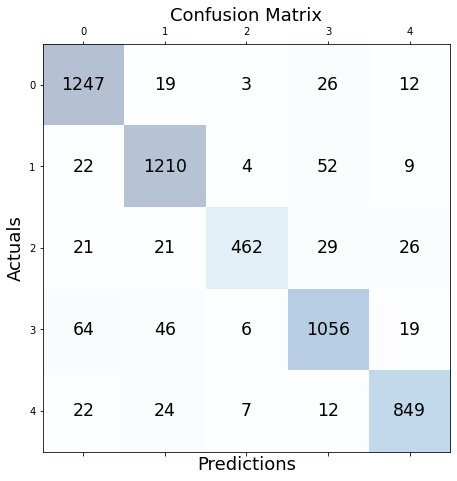

In [71]:
cm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Accuracy of LogisticRegression - 92.03%

### Classification Report

In [72]:
category_names = ["Bank account services", "Credit card / Prepaid card", "Mortgages/loans", 
                     "Theft/Dispute reporting", "Others"]

In [73]:
print(classification_report(y_test, y_pred, target_names = category_names))

                            precision    recall  f1-score   support

     Bank account services       0.91      0.95      0.93      1307
Credit card / Prepaid card       0.92      0.93      0.92      1297
           Mortgages/loans       0.96      0.83      0.89       559
   Theft/Dispute reporting       0.90      0.89      0.89      1191
                    Others       0.93      0.93      0.93       914

                  accuracy                           0.92      5268
                 macro avg       0.92      0.91      0.91      5268
              weighted avg       0.92      0.92      0.92      5268

